In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam


In [28]:
train_dir = r"C:/Users/METEHAN/Desktop/Dosyalar/Python Kodları/API/Deep_Learning"

In [37]:
# Eğitim verilerini normalleştirme ve veri artırma işlemleri
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

# Eğitim ve doğrulama verilerini yükleme
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)



Found 1619 images belonging to 2 classes.
Found 404 images belonging to 2 classes.


In [41]:
# CNN modelini kurma
model = models.Sequential()

# Evrişim ve Havuzlama Katmanları
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tam Bağlantılı Katmanlar
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 
model.add(layers.Dropout(0.5)) 


# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\METEHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [44]:
# Modeli eğitme
model_final = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)


c:\Users\METEHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 423ms/step - accuracy: 0.4946 - loss: 4.6248 - val_accuracy: 0.5026 - val_loss: 0.8791
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 3.8122 - val_accuracy: 0.4500 - val_loss: 0.9221
Epoch 3/5


c:\Users\METEHAN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 408ms/step - accuracy: 0.5054 - loss: 4.4331 - val_accuracy: 0.4974 - val_loss: 0.8410
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5312 - loss: 3.3593 - val_accuracy: 0.5500 - val_loss: 0.7513
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - accuracy: 0.5191 - loss: 4.2854 - val_accuracy: 0.5052 - val_loss: 0.8237


In [45]:
# Modeli değerlendirme
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.5134 - loss: 0.8099
Test accuracy: 0.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Bu bir kedi!


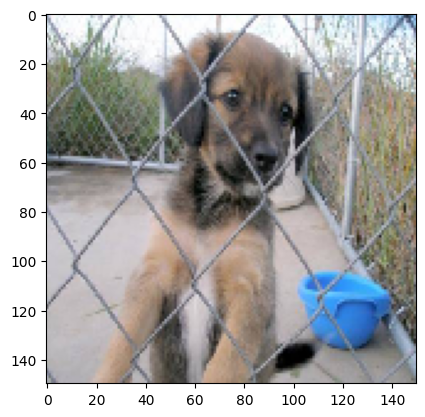

In [47]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Görüntüyü 150x150 boyutuna getiriyoruz
    img_array = image.img_to_array(img) / 255.0  # Normalizasyon (0-255 aralığından 0-1'e çekiyoruz)
    img_array = np.expand_dims(img_array, axis=0)  # Modelin anlaması için boyutu genişletiyoruz

    prediction = model.predict(img_array)
    
    # Tahmini ekrana yazdırma
    if prediction[0][0] > 0.5:  # prediction[0][0] ifadesiyle tahmin sonucunu alıyoruz
        print("Bu bir köpek!")
    else:
        print("Bu bir kedi!")
    
    # Görüntüyü gösterme
    plt.imshow(img)
    plt.show()

# Örnek kullanım: 
# Burada img_path, tahmin yapılacak görüntünün tam yolunu belirtmelisin
img_path = r'C:/Users/METEHAN/Desktop/Dosyalar/Python Kodları/API/Deep_Learning/dogs/dog.4042.jpg'  # Buraya kendi görüntü dosyanın yolunu yaz
predict_image(img_path)
